In [39]:
import helpers.qr 
import helpers.wavelet
import helpers.wm
import helpers.plots
import helpers.metrics

#Original data
import numpy as np
#load .npy file
data = np.load('../data/npy/smallPiston.npy')
injector = np.load('../data/npy/injector.npy')

#Watermark data 
watermark= helpers.qr.qrToArray('../data/qr/qr_code.png')

data.shape, injector.shape, watermark.shape

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


((207, 232, 232), (60, 60, 60), (370, 370))

In [15]:
wavelist=helpers.wavelet.wavelist()

wavelist= [
 'bior6.8',
 'coif17',
 'db38',
 'dmey',
 'haar',]

In [16]:
watermarked_coeffs_dict_injector= {}
alpha_value = 0.001

for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet] = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_value) 



In [17]:
watermarked_coeffs_dict_injector['dmey']

{'aaa': array([[[517.46754789, 514.32348997, 521.00129991, ..., 521.00129991,
          514.32348997, 517.46754789],
         [514.32348997, 511.3289896 , 518.05047491, ..., 518.05047491,
          511.3289896 , 514.32348997],
         [521.00129991, 518.05047491, 523.3267338 , ..., 523.3267338 ,
          518.05047491, 521.00129991],
         ...,
         [521.00129991, 518.05047491, 523.3267338 , ..., 523.3267338 ,
          518.05047491, 521.00129991],
         [514.32348997, 511.3289896 , 518.05047491, ..., 518.05047491,
          511.3289896 , 514.32348997],
         [517.46754789, 514.32348997, 521.00129991, ..., 521.00129991,
          514.32348997, 517.46754789]],
 
        [[508.25001586, 505.33518005, 511.44685739, ..., 511.44685739,
          505.33518005, 508.25001586],
         [505.33518005, 502.60754915, 508.67236891, ..., 508.67236891,
          502.60754915, 505.33518005],
         [511.44685739, 508.67236891, 513.72390457, ..., 513.72390457,
          508.67236891, 5

In [18]:
#Quantization func
def quantize_data(data, quantization_level):
    return np.round(data / quantization_level) * quantization_level

In [19]:
watermarked_data_dict_injector ={} 


for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet]['aaa']= quantize_data(watermarked_coeffs_dict_injector[wavelet]['aaa'], 1)
    watermarked_data_dict_injector[wavelet] =helpers.wavelet.reconstructWmVolume(watermarked_coeffs_dict_injector[wavelet], wavelet)

In [21]:
helpers.plots.ivyplot(watermarked_data_dict_injector['coif17'])

Container(children=[VBox(children=(HBox(children=(Label(value='levels:'), FloatSlider(value=0.2, max=1.0, step…

0

In [23]:
watermark_dict ={} 

for wavelet in wavelist: 
    watermark_dict[wavelet] =helpers.wm.retrieveWm(injector, watermarked_coeffs_dict_injector[wavelet], wavelet, alpha_value) 

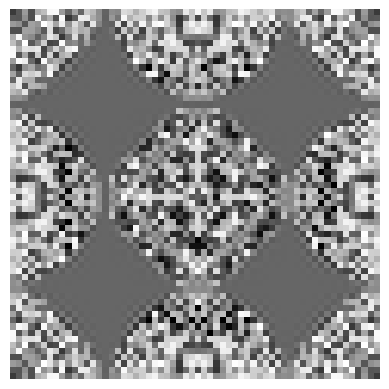

0

In [26]:
helpers.plots.npyplot(watermark_dict['dmey'][0])

## Quantization = 0.1

In [27]:
watermarked_coeffs_dict_injector= {}
alpha_value = 0.001

for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet] = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_value) 

watermarked_data_dict_injector ={} 


for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet]['aaa']= quantize_data(watermarked_coeffs_dict_injector[wavelet]['aaa'], 0.1)
    watermarked_data_dict_injector[wavelet] =helpers.wavelet.reconstructWmVolume(watermarked_coeffs_dict_injector[wavelet], wavelet) 
    
    watermark_dict ={} 

for wavelet in wavelist: 
    watermark_dict[wavelet] =helpers.wm.retrieveWm(injector, watermarked_coeffs_dict_injector[wavelet], wavelet, alpha_value) 
    
    

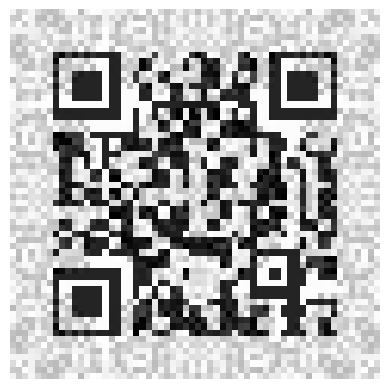

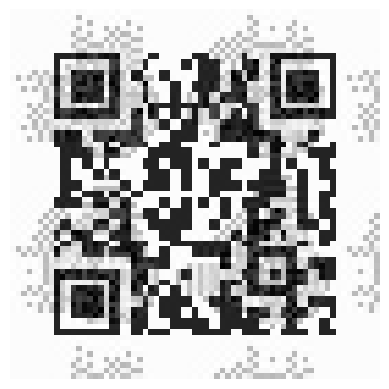

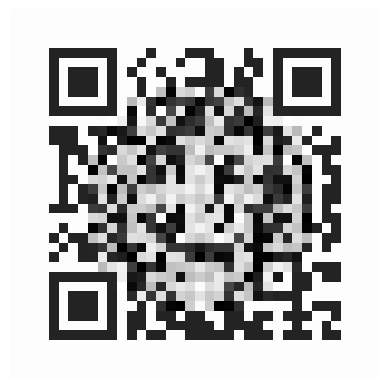

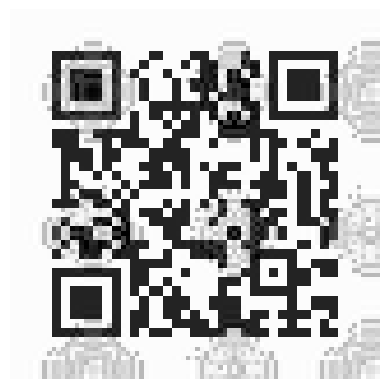

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sample numpy arrays

array1 = watermark_dict['dmey'][0]
array2 = watermark_dict['db38'][0]
array3 = watermark_dict['bior6.8'][0]
array4 = watermark_dict['coif17'][0]

# Create a figure and a set of subplots

# Plot each array on a different subplot
helpers.plots.npyplot(array1)

axs[0, 0].set_title('Array 1')

helpers.plots.npyplot(array2)
axs[0, 1].set_title('Array 2')

helpers.plots.npyplot(array3)
axs[1, 0].set_title('Array 3')

helpers.plots.npyplot(array4)
axs[1, 1].set_title('Array 4')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


In [41]:
from scipy.ndimage import zoom
def resize_wm(watermark, new_size):
    # Desired new size (smaller)
    # Resize the QR code array using scipy.ndimage.zoom()
    watermark = zoom(watermark, (new_size[0] / watermark.shape[0], new_size[1] / watermark.shape[1]), order=0)
    return watermark

#Calculate PSNR  
psnr_dict_wm_injector= {}
for wavelet in wavelist: 
        
    wm_injector= resize_wm(watermark,watermark_dict[wavelet][0].shape)
    psnr_dict_wm_injector[wavelet] = helpers.metrics.calculate_psnr_skimage(wm_injector, watermark_dict[wavelet][0])


In [42]:
psnr_dict_wm_injector

{'bior6.8': 16.939189699161687,
 'coif17': 17.195535779511527,
 'db38': 16.885390209425918,
 'dmey': 18.69013196482991,
 'haar': 16.623285788993726}

## Quantization = 0.5

In [43]:
watermarked_coeffs_dict_injector= {}
alpha_value = 0.001

for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet] = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_value) 

watermarked_data_dict_injector ={} 


for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet]['aaa']= quantize_data(watermarked_coeffs_dict_injector[wavelet]['aaa'], 0.5)
    watermarked_data_dict_injector[wavelet] =helpers.wavelet.reconstructWmVolume(watermarked_coeffs_dict_injector[wavelet], wavelet) 
    
    watermark_dict ={} 

for wavelet in wavelist: 
    watermark_dict[wavelet] =helpers.wm.retrieveWm(injector, watermarked_coeffs_dict_injector[wavelet], wavelet, alpha_value) 
    
    

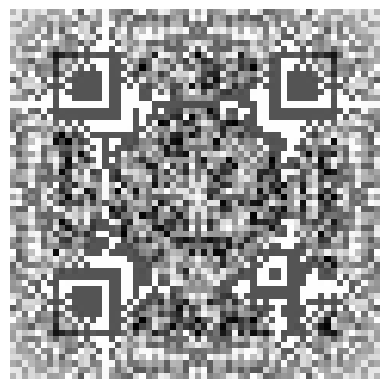

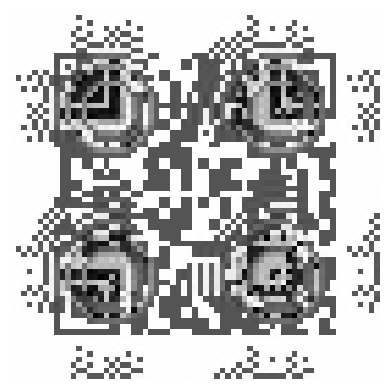

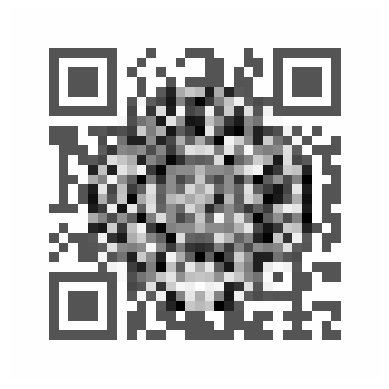

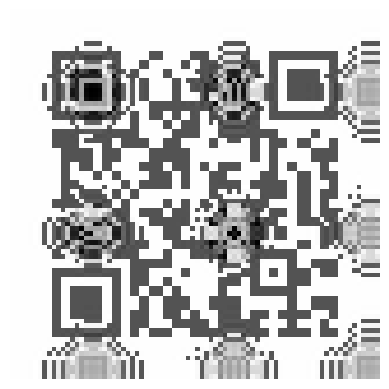

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample numpy arrays

array1 = watermark_dict['dmey'][0]
array2 = watermark_dict['db38'][0]
array3 = watermark_dict['bior6.8'][0]
array4 = watermark_dict['coif17'][0]

# Create a figure and a set of subplots

# Plot each array on a different subplot
helpers.plots.npyplot(array1)

axs[0, 0].set_title('Array 1')

helpers.plots.npyplot(array2)
axs[0, 1].set_title('Array 2')

helpers.plots.npyplot(array3)
axs[1, 0].set_title('Array 3')

helpers.plots.npyplot(array4)
axs[1, 1].set_title('Array 4')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
from scipy.ndimage import zoom
def resize_wm(watermark, new_size):
    # Desired new size (smaller)
    # Resize the QR code array using scipy.ndimage.zoom()
    watermark = zoom(watermark, (new_size[0] / watermark.shape[0], new_size[1] / watermark.shape[1]), order=0)
    return watermark

#Calculate PSNR  
psnr_dict_wm_injector= {}
for wavelet in wavelist: 
        
    wm_injector= resize_wm(watermark,watermark_dict[wavelet][0].shape)
    psnr_dict_wm_injector[wavelet] = helpers.metrics.calculate_psnr_skimage(wm_injector, watermark_dict[wavelet][0])


In [46]:
psnr_dict_wm_injector

{'bior6.8': 2.320912631503986,
 'coif17': 2.432314274451321,
 'db38': 2.1007133610972004,
 'dmey': 4.404467466892458,
 'haar': 1.9623517018250074}

In [49]:
watermarked_coeffs_dict_injector= {}
alpha_value = 0.001

for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet] = helpers.wavelet.embedWatermarkAddition(injector, watermark, wavelet, alpha_value) 

watermarked_data_dict_injector ={} 


for wavelet in wavelist: 
    watermarked_coeffs_dict_injector[wavelet]['aaa']= quantize_data(watermarked_coeffs_dict_injector[wavelet]['aaa'], 0.2)
    watermarked_data_dict_injector[wavelet] =helpers.wavelet.reconstructWmVolume(watermarked_coeffs_dict_injector[wavelet], wavelet) 
    
    watermark_dict ={} 

for wavelet in wavelist: 
    watermark_dict[wavelet] =helpers.wm.retrieveWm(injector, watermarked_coeffs_dict_injector[wavelet], wavelet, alpha_value) 
    
from scipy.ndimage import zoom
def resize_wm(watermark, new_size):
    # Desired new size (smaller)
    # Resize the QR code array using scipy.ndimage.zoom()
    watermark = zoom(watermark, (new_size[0] / watermark.shape[0], new_size[1] / watermark.shape[1]), order=0)
    return watermark

#Calculate PSNR  
psnr_dict_wm_injector= {}
for wavelet in wavelist: 
        
    wm_injector= resize_wm(watermark,watermark_dict[wavelet][0].shape)
    psnr_dict_wm_injector[wavelet] = helpers.metrics.calculate_psnr_skimage(wm_injector, watermark_dict[wavelet][0])

psnr_dict_wm_injector

{'bior6.8': 14.238955625949895,
 'coif17': 14.513218852091471,
 'db38': 13.783949988831125,
 'dmey': 13.316615326953523,
 'haar': 13.847712803696945}

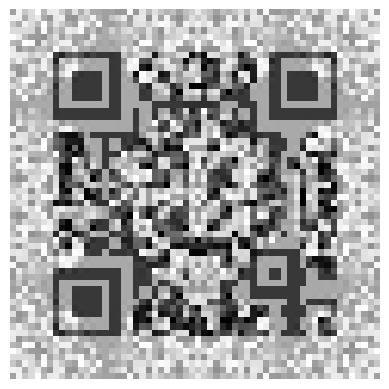

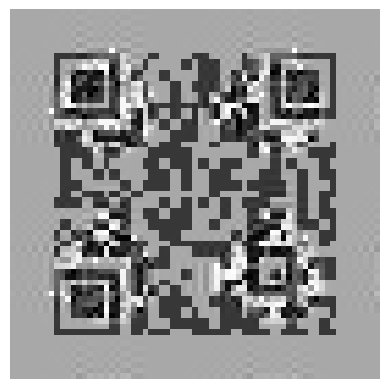

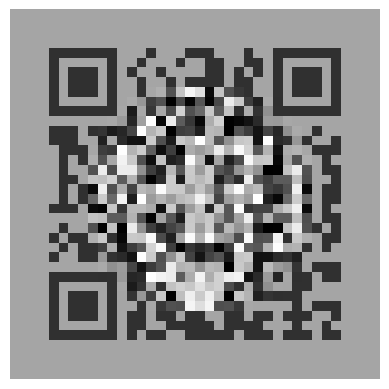

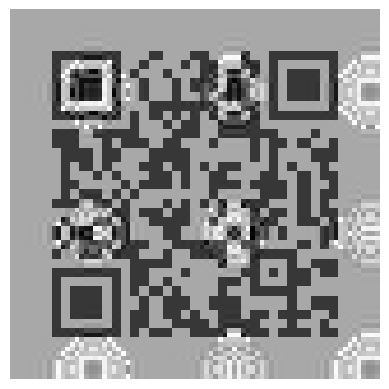

<Figure size 640x480 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Sample numpy arrays

array1 = watermark_dict['dmey'][0]
array2 = watermark_dict['db38'][0]
array3 = watermark_dict['bior6.8'][0]
array4 = watermark_dict['coif17'][0]

# Create a figure and a set of subplots

# Plot each array on a different subplot
helpers.plots.npyplot(array1)

axs[0, 0].set_title('Array 1')

helpers.plots.npyplot(array2)
axs[0, 1].set_title('Array 2')

helpers.plots.npyplot(array3)
axs[1, 0].set_title('Array 3')

helpers.plots.npyplot(array4)
axs[1, 1].set_title('Array 4')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()